in this project we want to predict the house Price(USD)

# plotting libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# reading dataset and obtaining some information about it

In [57]:
data_set=pd.read_csv("1632300362534233.csv")
data_set

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [58]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [59]:
data_set.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

 we need Area feature for our prediction but it is an object so we need to convert it to number. we have some null datas which we have to reomve them.

In [60]:
data_set["Area"] = pd.to_numeric(data_set["Area"],errors="coerce",downcast="integer")

In [61]:
data_set.isnull().sum()

Area           6
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [62]:
data_set["Area"].unique()

array([ 63.,  60.,  79.,  95., 123.,  70.,  87.,  59.,  54.,  71.,  68.,
        64., 136., 155., 140.,  42.,  93.,  65.,  99., 105., 160.,  77.,
       110., 100.,  90.,  49.,  96.,  67.,  62.,  55., 129., 109.,  58.,
       150., 130.,  88.,  51., 113.,  98.,  75.,  61.,  72., 122., 215.,
       101.,  53.,  74., 114., 151., 300.,  76., 148.,  40., 128.,  94.,
        97., 137.,  85.,  78.,  48.,  82., 120., 139.,  66.,  80.,  44.,
        50., 121., 141., 127., 180., 158., 144., 245., 190., 108., 117.,
       200., 125., 236., 220.,  86.,  84., 106., 320., 154., 210., 124.,
        83., 270., 104., 103., 165., 135., 132.,  81., 153., 166., 175.,
       170., 115., 118., 116.,  43., 230.,  91., 126., 450., 500., 145.,
       112., 192., 164., 265.,  92., 143., 350., 335., 235., 225., 221.,
       312., 188., 198., 650., 179., 256., 257., 167., 246., 168., 280.,
        69., 400., 660., 213.,  57., 102., 133.,  73., 134., 191., 282.,
        89., 111., 147., 157., 283.,  nan, 863., 41

as it is clear from above after converting the Area feature to number ، too large  datas will be deleted from our dataset. now we have to remove null datas and we will have suitable datas for our prediction.

In [63]:
mycopy=data_set.dropna(axis=0).copy()

In [64]:
mycopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB


In [65]:
mycopy

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


So far we have removed the missing datas Now we have to deal with other pre-processing whcih we need to do

# converting categorical variables into numerical

know we can do other preprocessing on our dataset. we have to covert categorical datas to numerical datas so we can use them for our prediction.

In [66]:
encoder=LabelEncoder()
mycopy.iloc[:,2]=encoder.fit_transform(mycopy.iloc[:,2])

encoder2=LabelEncoder()
mycopy.iloc[:,3]=encoder2.fit_transform(mycopy.iloc[:,3])

encoder3=LabelEncoder()
mycopy.iloc[:,4]=encoder3.fit_transform(mycopy.iloc[:,4])

In [67]:
mycopy.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,0.847536,0.915072,0.787536,5.375563e+09,1.791854e+05
std,69.550976,0.760216,0.359522,0.278814,0.409111,8.125918e+09,2.708639e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


# plotting

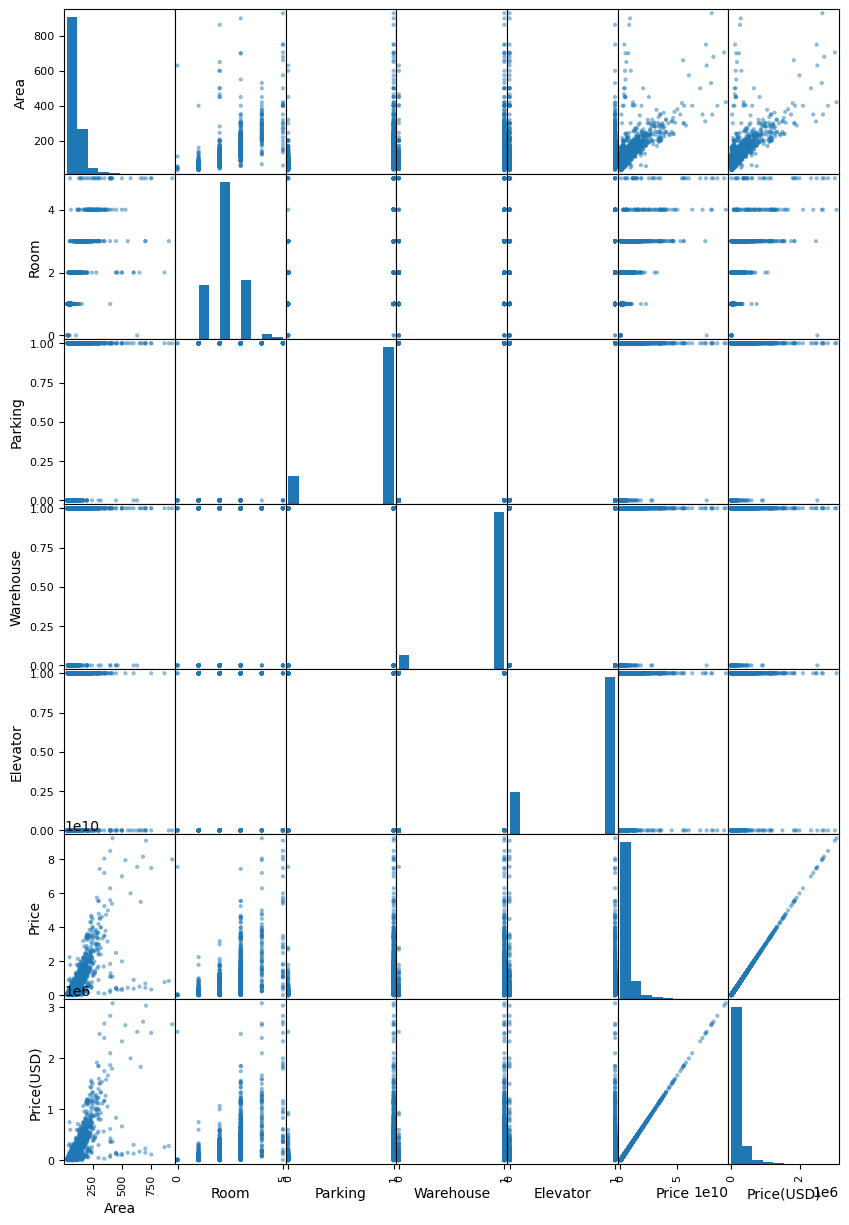

In [68]:
feature=["Area","Room","Parking","Warehouse","Elevator","Price","Price(USD)"]
scatter_matrix(mycopy[feature],figsize=(10,15))
plt.show()

as it is seen we have linear relationship between Price(USD)(our target) and other features. now we need to find correlation between features

<AxesSubplot:>

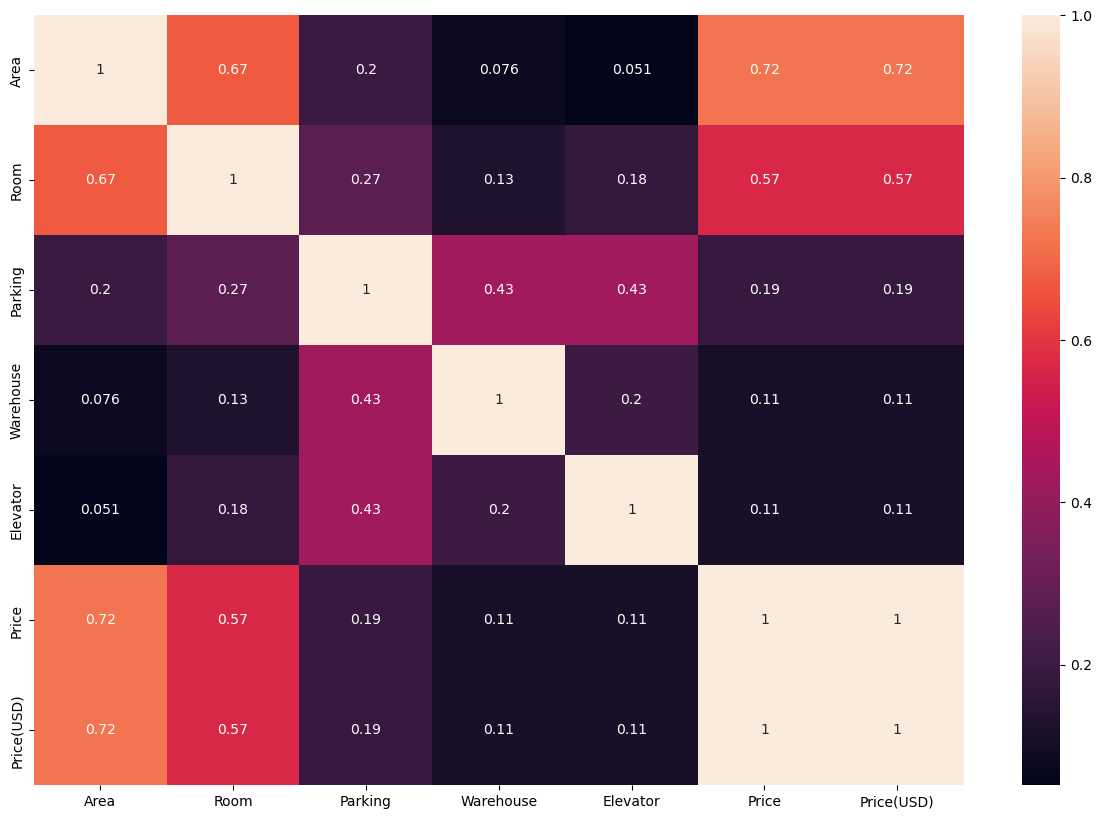

In [69]:
corr=mycopy.corr()
plt.subplots(figsize=(15,10))
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

as it is seen the "Area" and "Room"and "Parking"  have strong correlation with our target. we will use these for featuers four predicting "Price(USD)"

In [70]:
mycopy1=mycopy.drop("Address",axis=1)

outliers are seen in scatter_matrix.we will use StandardScaler for avoiding of these outliers

In [71]:
scaler=StandardScaler()
scaler.fit_transform(mycopy1)

array([[-0.63153331, -1.42237999,  0.42413507, ...,  0.51940625,
        -0.43392927, -0.43392926],
       [-0.67467339, -1.42237999,  0.42413507, ...,  0.51940625,
        -0.43392927, -0.43392926],
       [-0.40145286, -0.10677383,  0.42413507, ...,  0.51940625,
        -0.59393439, -0.5939344 ],
       ...,
       [-0.45897297, -0.10677383, -2.35773946, ..., -1.92527527,
        -0.61670435, -0.61670434],
       [-0.02757214, -0.10677383,  0.42413507, ...,  0.51940625,
         0.02762395,  0.02762396],
       [-0.35831278, -0.10677383, -2.35773946, ...,  0.51940625,
        -0.61731975, -0.61731975]])

In [72]:
X=mycopy1[["Area","Room","Parking","Warehouse","Elevator"]].values
Y=mycopy1["Price(USD)"].values

# train_test_asplit

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

# predicting

In [74]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

# Accuracy measurement

In [75]:
pred=reg.predict(x_test)
print(f"R2-score :  {r2_score(y_test,pred)}")

R2-score :  0.5906511029284084
